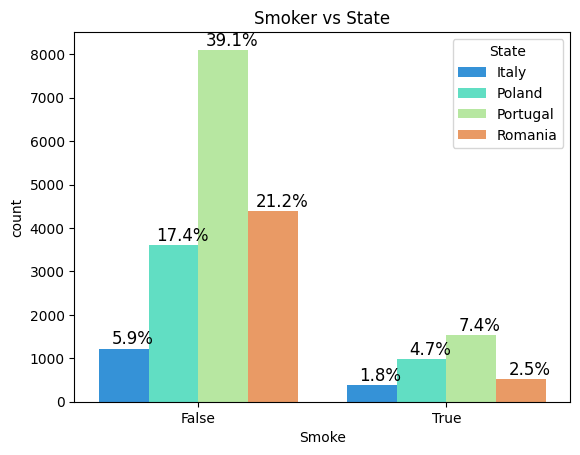

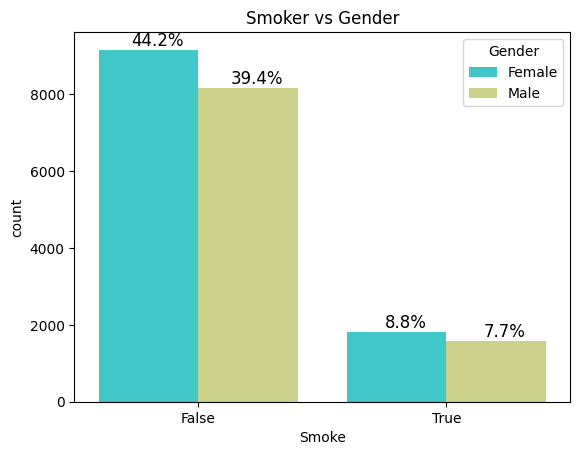

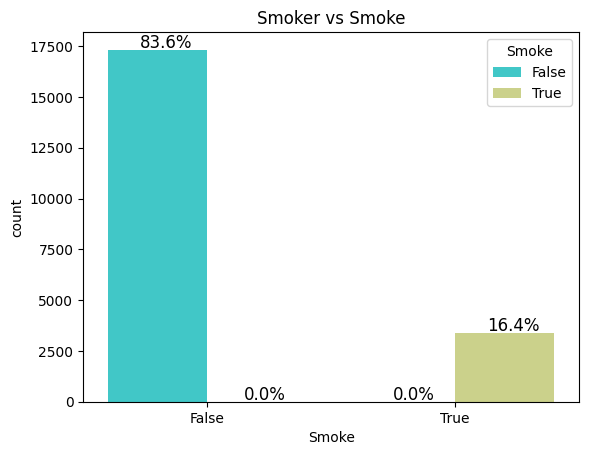

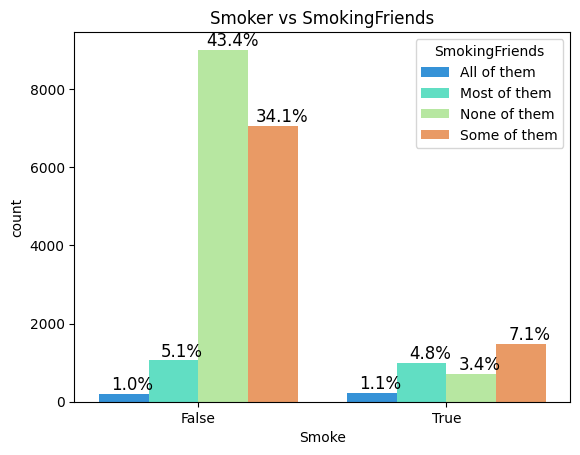

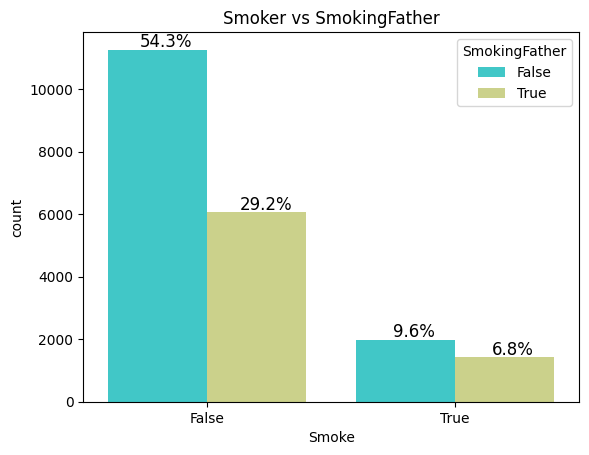

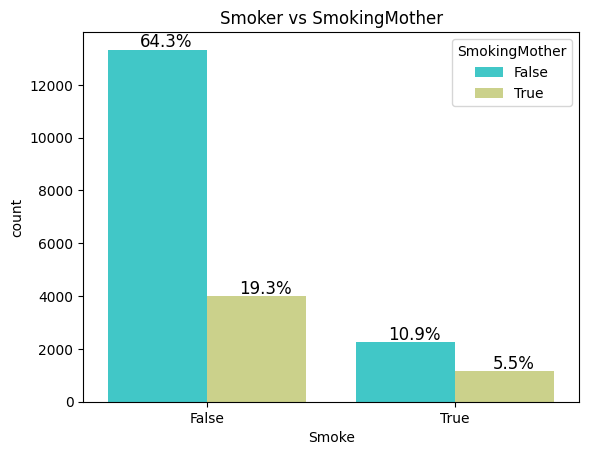

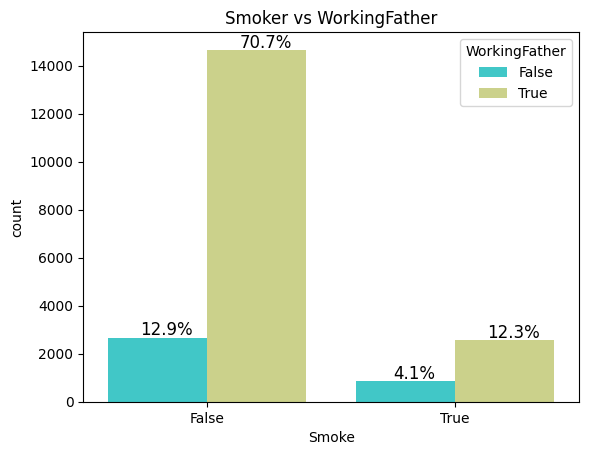

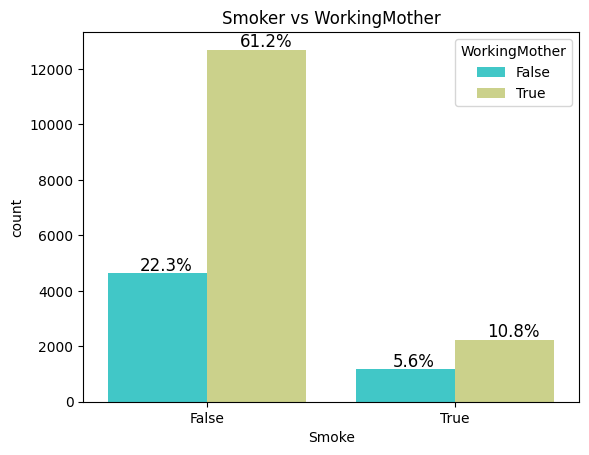

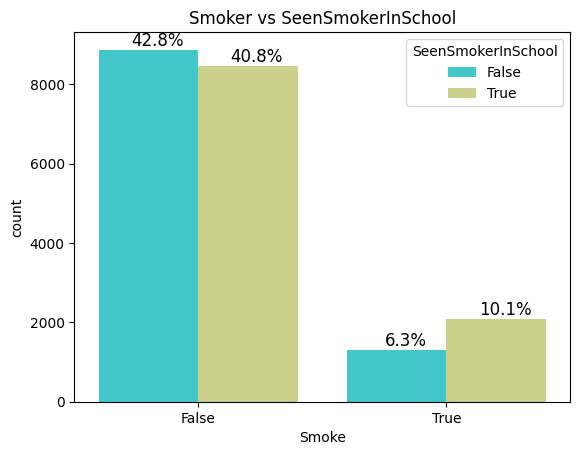

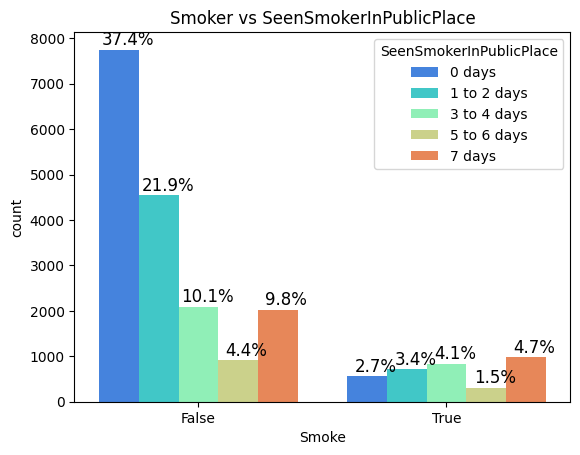

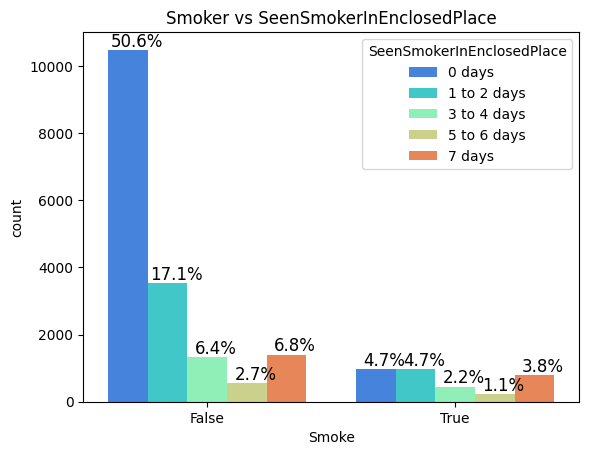

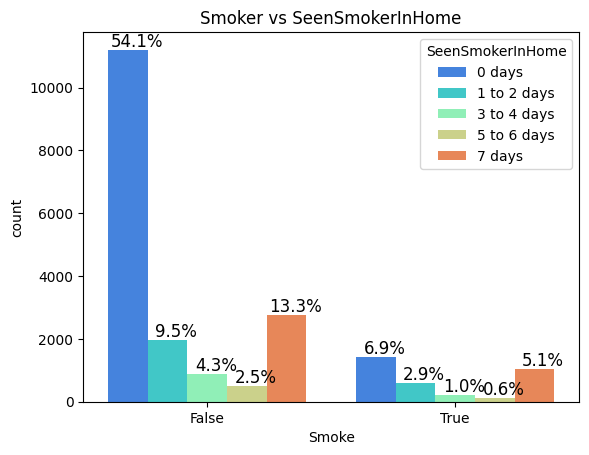

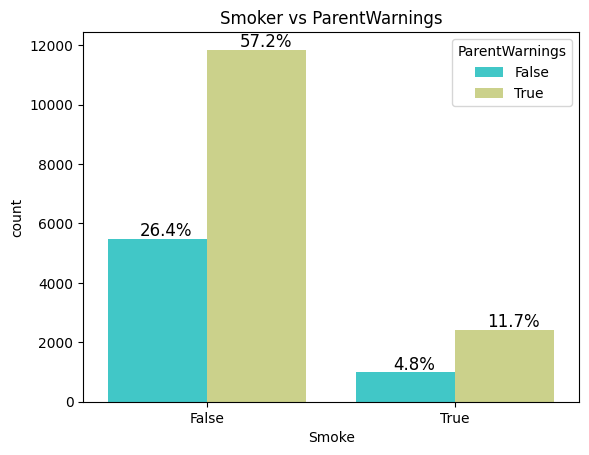

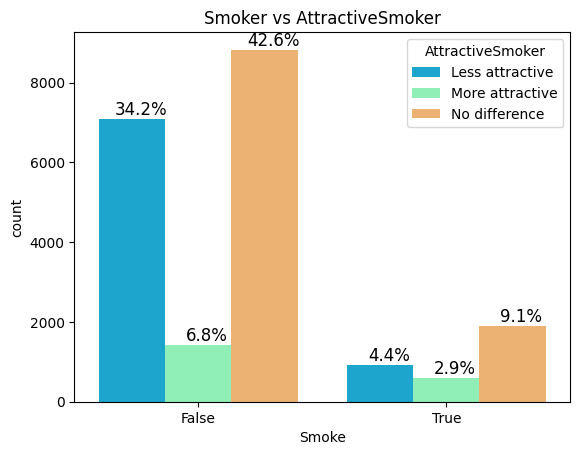

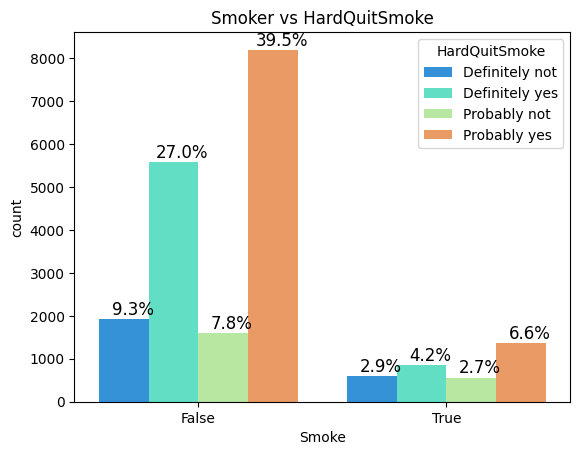

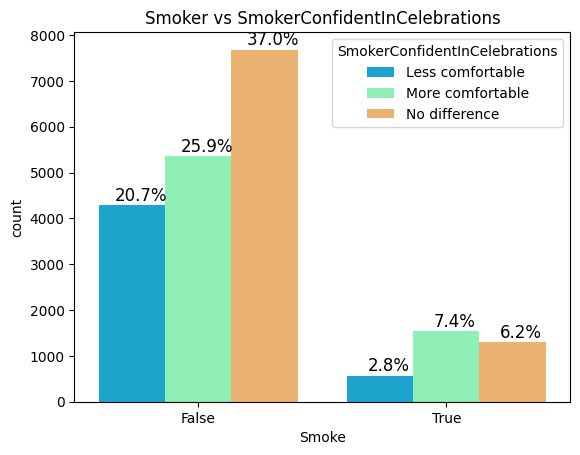

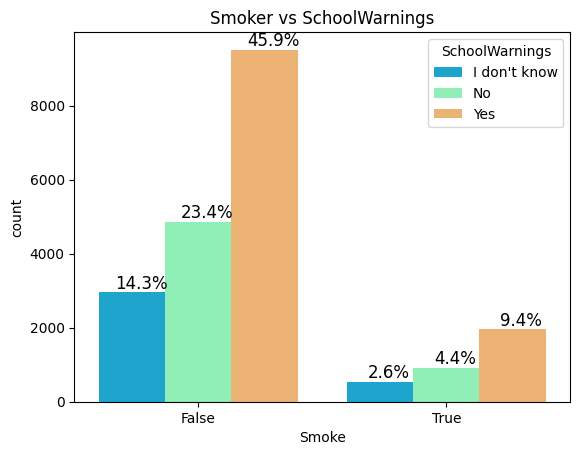

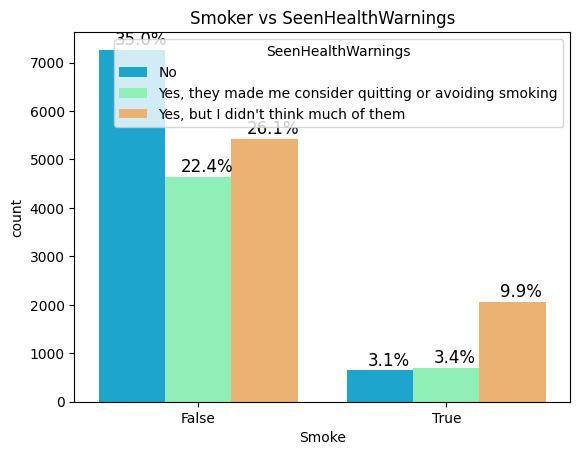

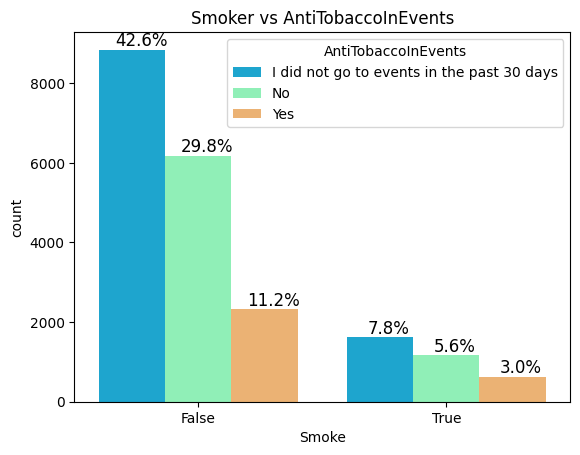

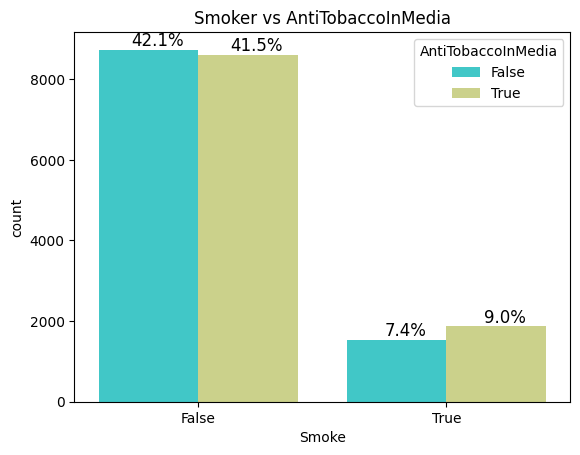

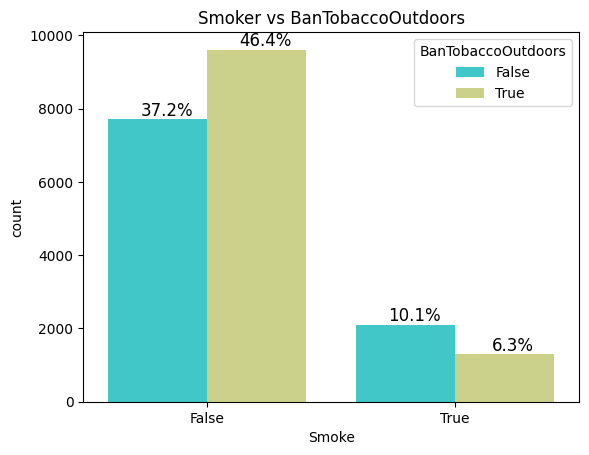

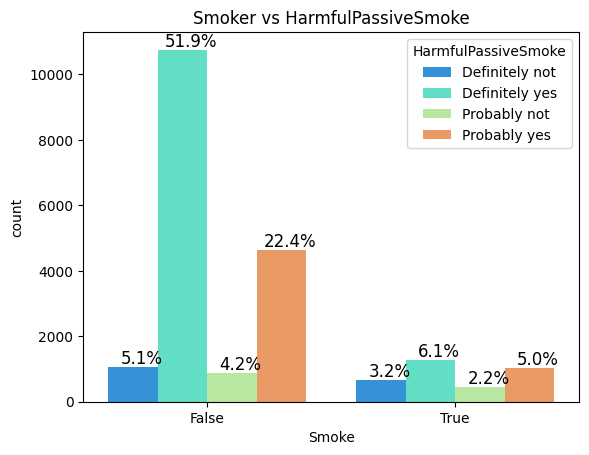

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def bar_perc(plot, dataframe, feature):
    total = len(feature) # length of the column
    total_smokers = len(dataframe[dataframe['Smoke'] == True]) # length of the smokers
    total_non_smokers = len(dataframe[dataframe['Smoke'] == False]) # length of the non-smokers
  
    for i, p in enumerate(plot.patches):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
     
        x = p.get_x() + p.get_width() / 2 - (0.05 if (100 * p.get_height()/total) < 10 else 0.07) # width of the plot
        y = p.get_y() + p.get_height() + 100        # height of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
        

dataset = pd.read_csv("../../data/processed/GYTS_dataset.csv")

# Convert columns to categorical
categorical_columns = ["State", "Gender", "Age", "SmokingFriends", "SeenSmokerInPublicPlace",
                       "SeenSmokerInEnclosedPlace", "SeenSmokerInHome", "AttractiveSmoker",
                       "HardQuitSmoke", "SmokerConfidentInCelebrations", "SchoolWarnings",
                       "SeenHealthWarnings", "AntiTobaccoInEvents", "HarmfulPassiveSmoke"]
dataset[categorical_columns] = dataset[categorical_columns].astype('category')

# Convert to boolean
boolean_columns = ["Smoke", "SeenSmokerInSchool", "ParentWarnings", "AntiTobaccoInMedia",
                   "BanTobaccoOutdoors", "SmokingFather", "SmokingMother", "WorkingFather",
                   "WorkingMother"]
dataset[boolean_columns] = dataset[boolean_columns].astype('bool')

classes = dataset['Smoke'].unique()

list_of_columns = ["State", "Gender", "Smoke", "SmokingFriends", 'SmokingFather', 'SmokingMother', 'WorkingFather', 'WorkingMother',
                       "SeenSmokerInSchool", "SeenSmokerInPublicPlace", "SeenSmokerInEnclosedPlace",
                       "SeenSmokerInHome", "ParentWarnings", "AttractiveSmoker", "HardQuitSmoke",
                       "SmokerConfidentInCelebrations", "SchoolWarnings", "SeenHealthWarnings",
                       "AntiTobaccoInEvents", "AntiTobaccoInMedia", "BanTobaccoOutdoors",
                       "HarmfulPassiveSmoke"
                    ]

dataset['SeenHealthWarnings'] = dataset['SeenHealthWarnings'].map(
    {"Yes, and they led me to think about quitting smoking or not starting smoking": "Yes, they made me consider quitting or avoiding smoking",
     "Yes, but I didn't think much of them": "Yes, but I didn't think much of them",
     "No": "No",})

for i, column in enumerate(list_of_columns):
    ax=sns.countplot(x='Smoke', hue=column, data=dataset, palette='rainbow', dodge=True)
    bar_perc(ax,dataset, dataset[column])
    ax.set(title=f"Smoker vs {column}");
    
    plt.savefig(f"../../data/processed/multivariate_analyisis/{column}_histogram.png")
    plt.show()
